<a href="https://colab.research.google.com/github/AnwarNoob-code/scraping-media/blob/main/tugas_besar_1_visualisasi_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-6ea4e43841f2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")


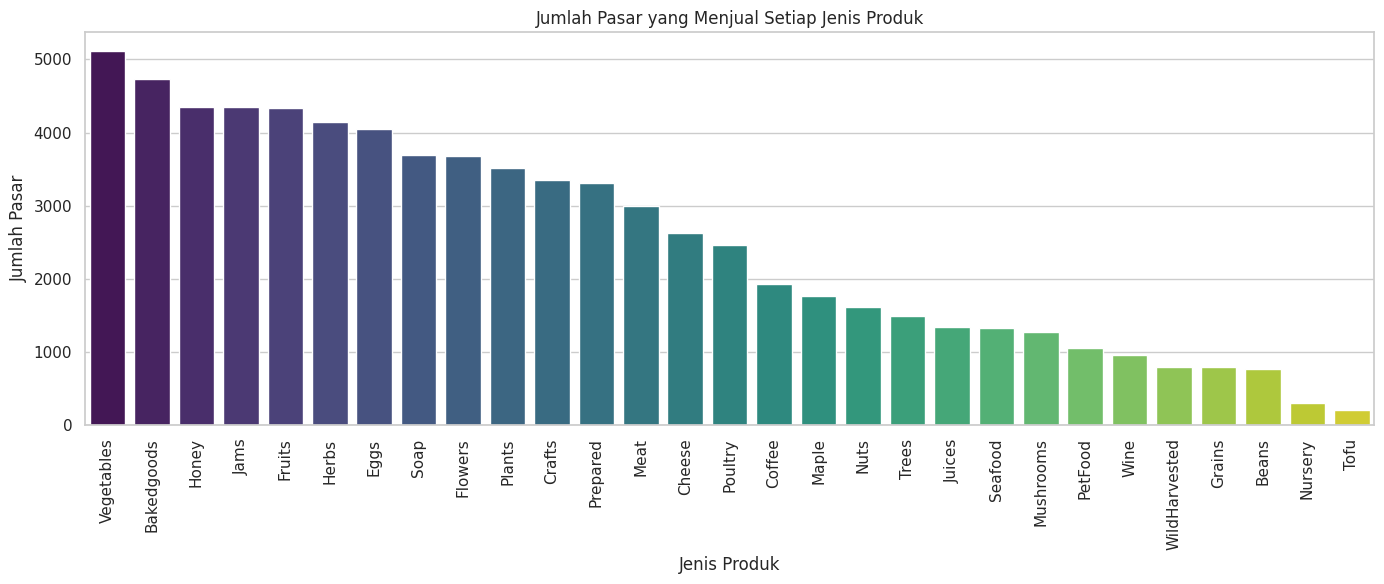

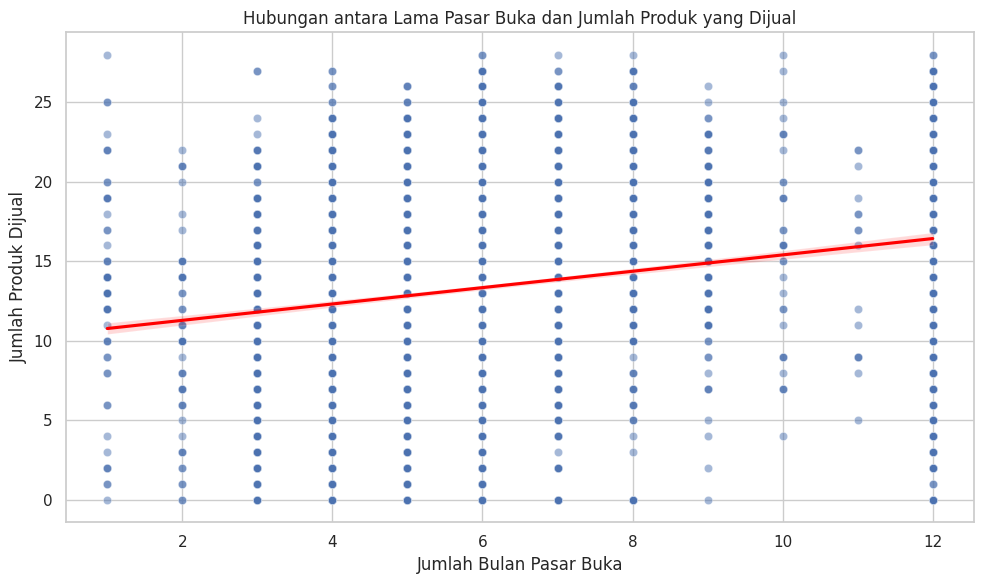

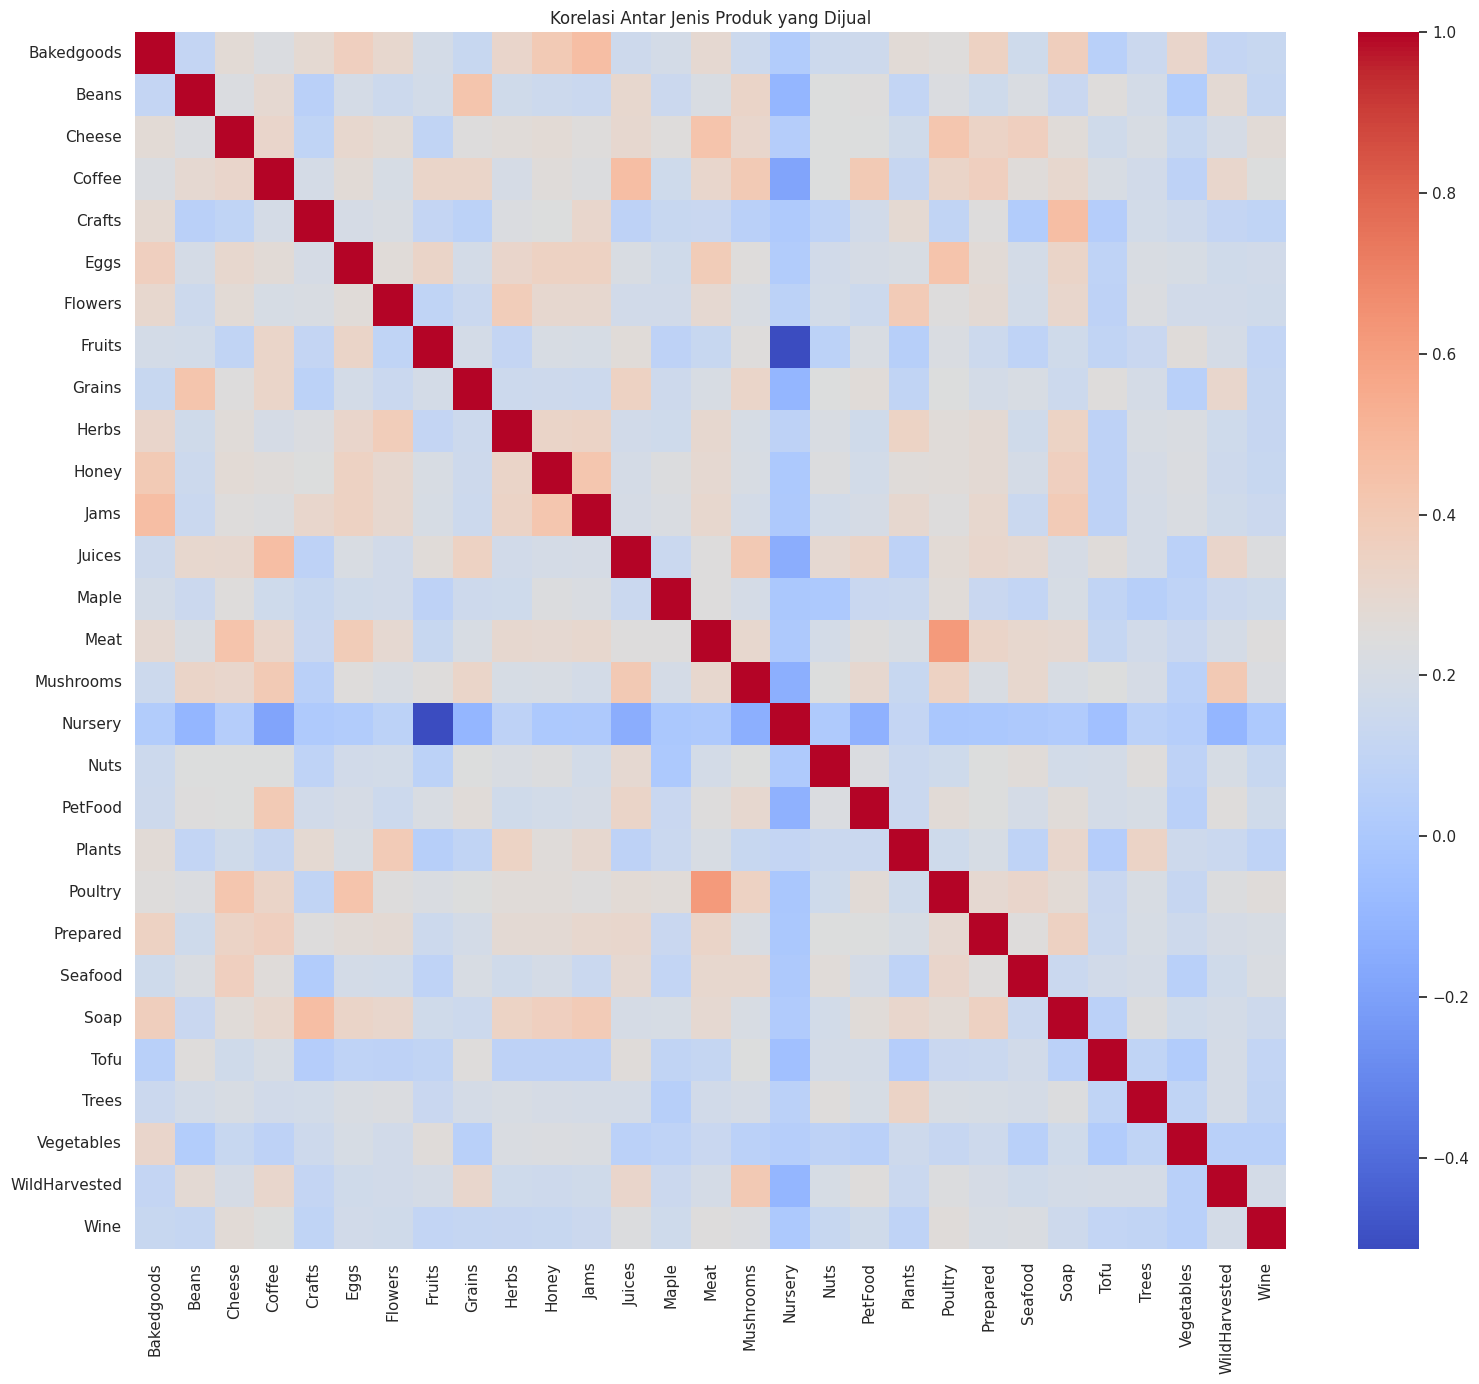

<ipython-input-1-6ea4e43841f2>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette="magma")


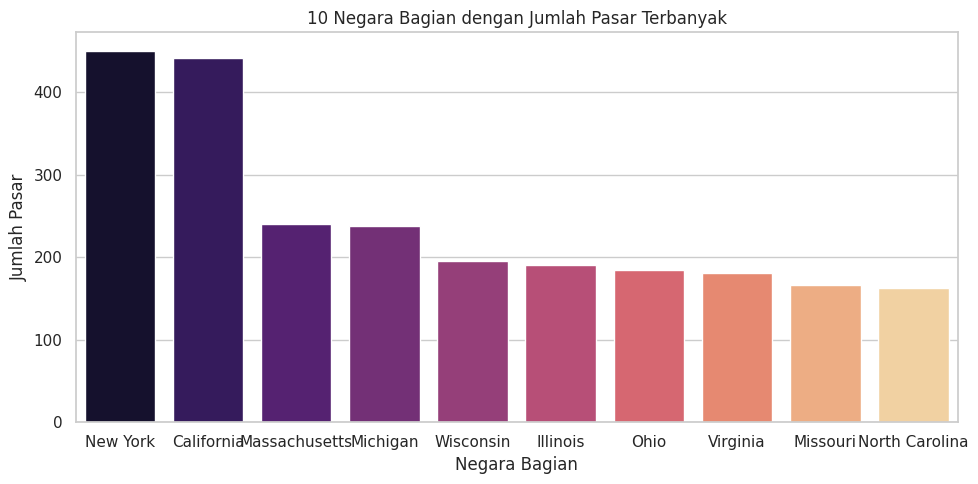

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset
df = pd.read_csv("markets_cleaned.csv")

# Atur style visualisasi
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# --- Visualisasi 1: Produk paling umum dijual ---
product_columns = df.columns[8:37]  # Kolom produk biner
product_counts = df[product_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(x=product_counts.index, y=product_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Jumlah Pasar yang Menjual Setiap Jenis Produk")
plt.ylabel("Jumlah Pasar")
plt.xlabel("Jenis Produk")
plt.tight_layout()
plt.show()

# --- Visualisasi 2: Hubungan lama buka dan jumlah produk dijual ---
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="months_open", y="num_items_sold", alpha=0.5)
sns.regplot(data=df, x="months_open", y="num_items_sold", scatter=False, color='red')
plt.title("Hubungan antara Lama Pasar Buka dan Jumlah Produk yang Dijual")
plt.xlabel("Jumlah Bulan Pasar Buka")
plt.ylabel("Jumlah Produk Dijual")
plt.tight_layout()
plt.show()

# --- Visualisasi 3: Korelasi antar produk ---
corr_matrix = df[product_columns].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Korelasi Antar Jenis Produk yang Dijual")
plt.tight_layout()
plt.show()

# --- Visualisasi 4: Negara bagian dengan pasar terbanyak ---
state_counts = df["state"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="magma")
plt.title("10 Negara Bagian dengan Jumlah Pasar Terbanyak")
plt.ylabel("Jumlah Pasar")
plt.xlabel("Negara Bagian")
plt.tight_layout()
plt.show()


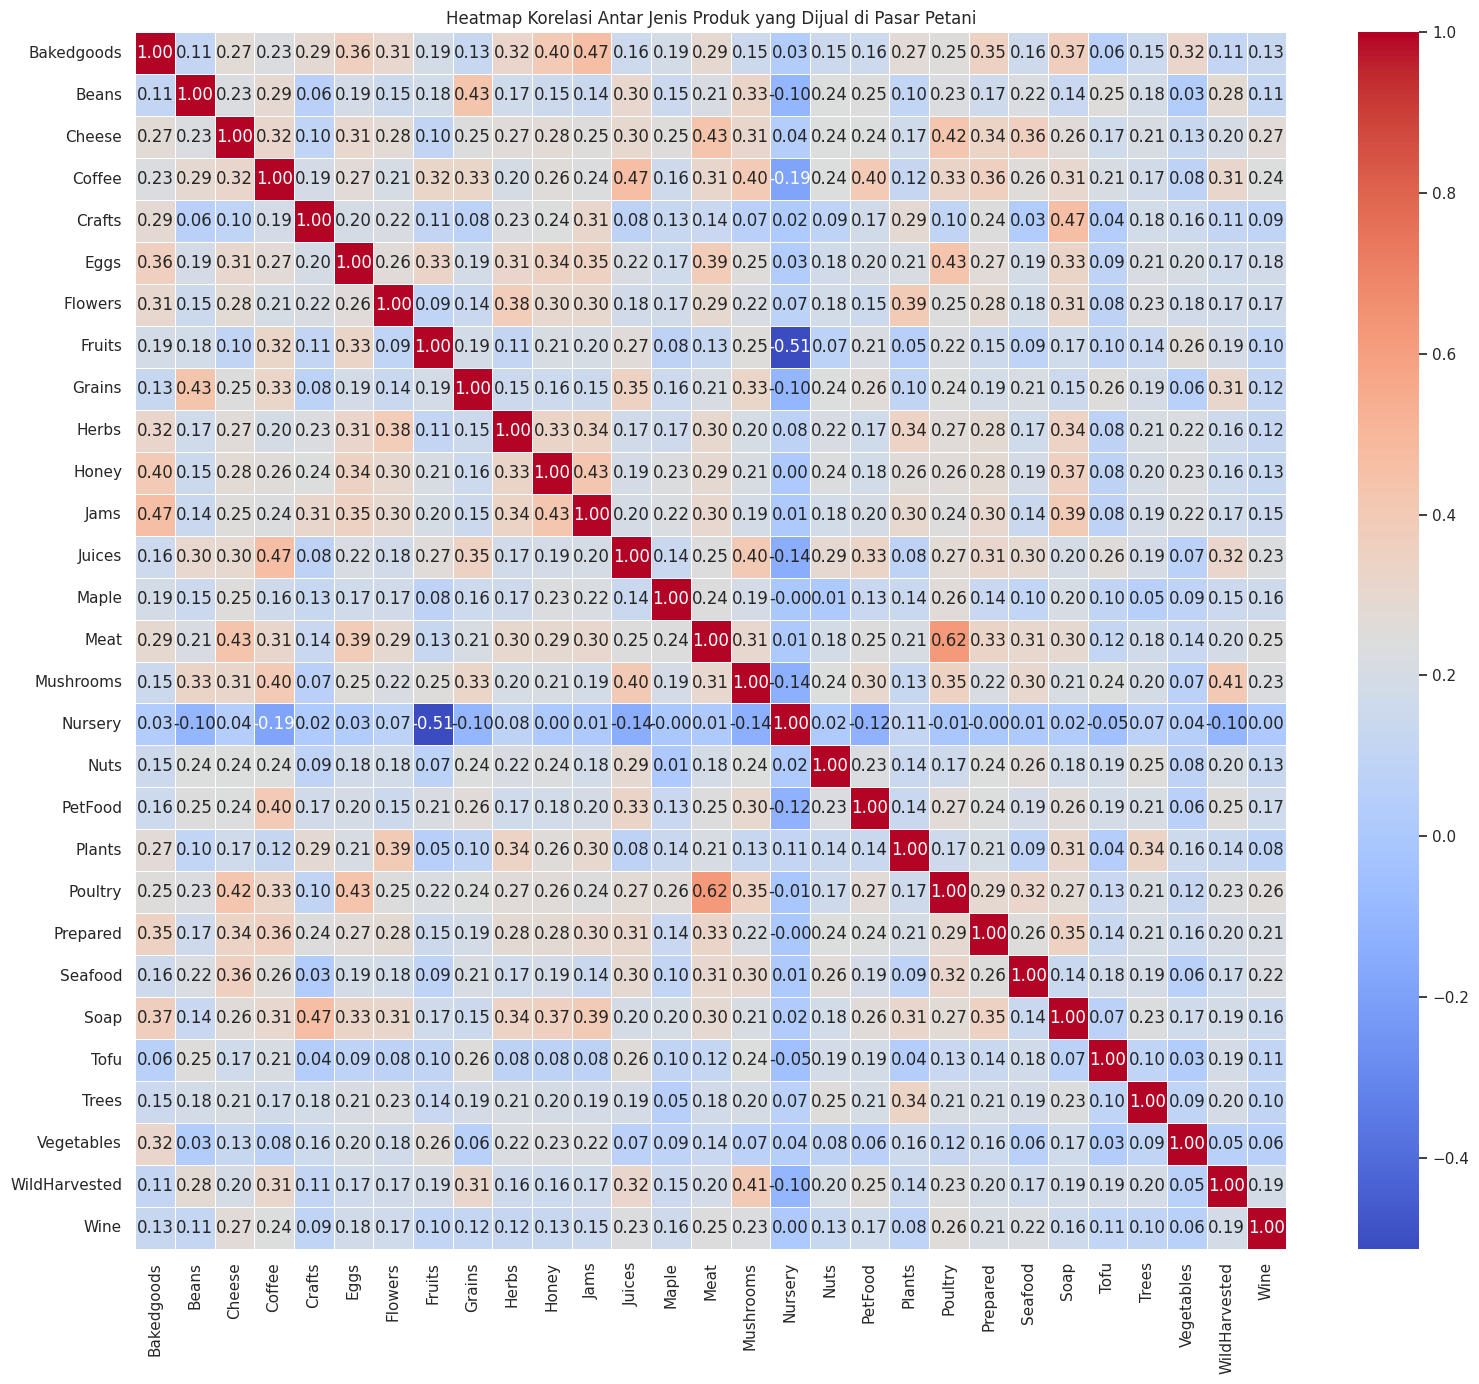

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset
df = pd.read_csv("markets_cleaned.csv")

# Ambil kolom produk (kolom ke-9 sampai 37)
product_columns = df.columns[8:37]
product_data = df[product_columns]

# Hitung matriks korelasi
correlation_matrix = product_data.corr()

# Buat heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Jenis Produk yang Dijual di Pasar Petani")
plt.tight_layout()
plt.show()


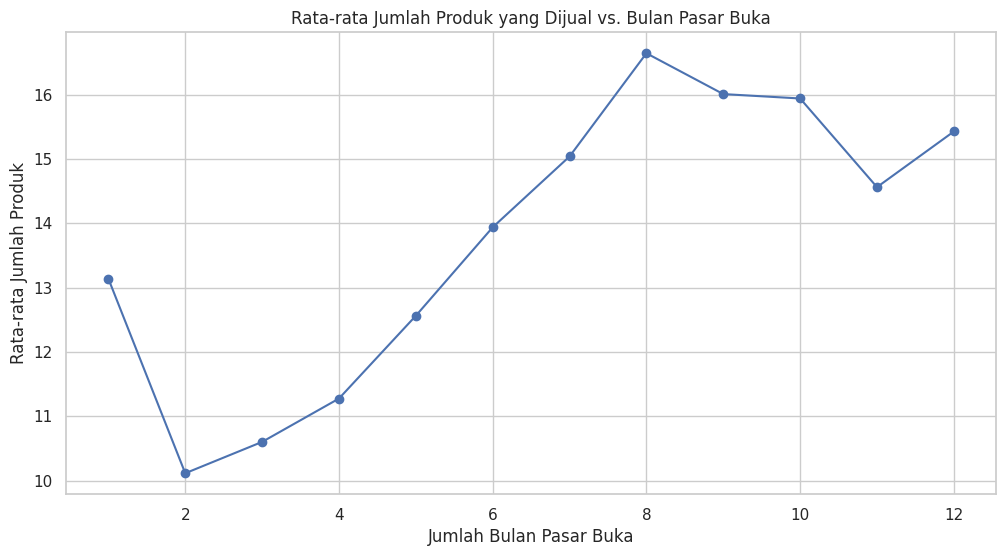

In [4]:
# Line Chart: Rata-rata produk yang dijual berdasarkan bulan buka
monthly_avg = df.groupby("months_open")["num_items_sold"].mean()
monthly_avg.plot(marker='o')
plt.title("Rata-rata Jumlah Produk yang Dijual vs. Bulan Pasar Buka")
plt.xlabel("Jumlah Bulan Pasar Buka")
plt.ylabel("Rata-rata Jumlah Produk")
plt.grid(True)
plt.show()


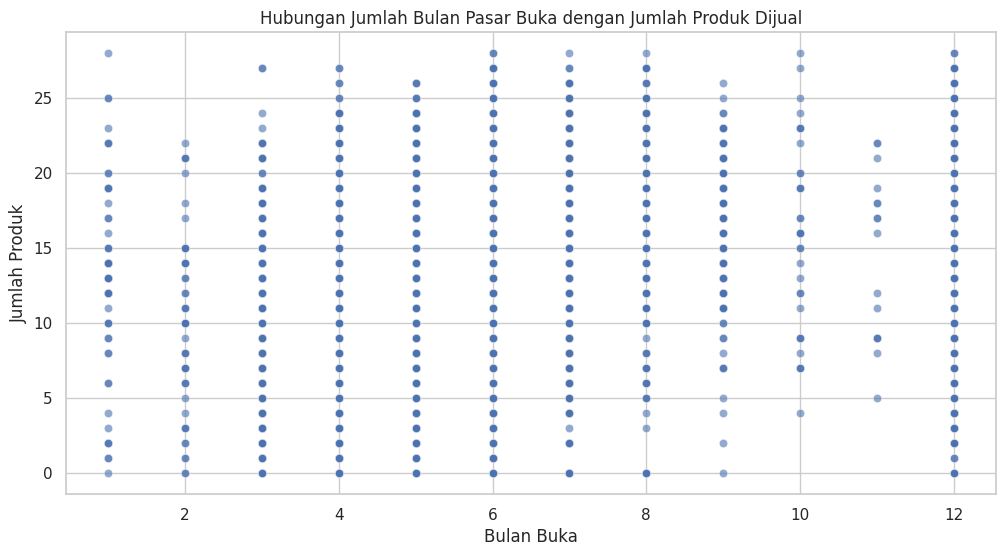

In [5]:
# Scatter Plot
sns.scatterplot(data=df, x="months_open", y="num_items_sold", alpha=0.6)
plt.title("Hubungan Jumlah Bulan Pasar Buka dengan Jumlah Produk Dijual")
plt.xlabel("Bulan Buka")
plt.ylabel("Jumlah Produk")
plt.show()


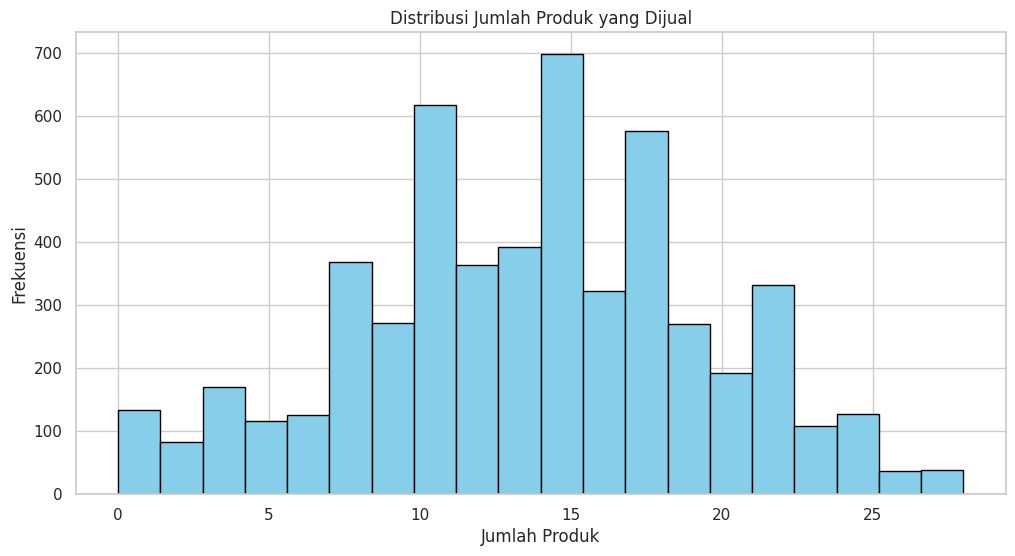

In [6]:
# Histogram
plt.hist(df["num_items_sold"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribusi Jumlah Produk yang Dijual")
plt.xlabel("Jumlah Produk")
plt.ylabel("Frekuensi")
plt.show()


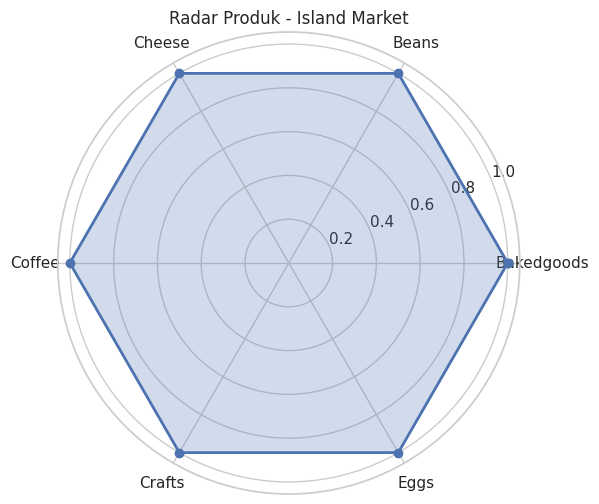

In [7]:
import numpy as np

# Radar Chart untuk 1 pasar
sample = df.iloc[0]
labels = df.columns[8:14]  # ambil beberapa kolom produk untuk ringkas
values = sample[labels].values

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.title(f"Radar Produk - {sample['name']}")
plt.show()


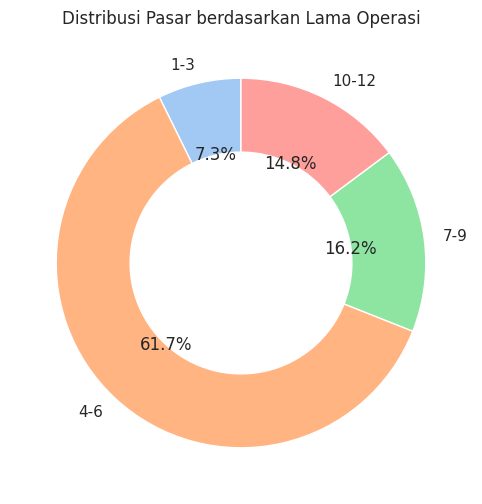

In [8]:
# Donut Chart: proporsi pasar berdasarkan jumlah bulan buka (kategori)
df["open_category"] = pd.cut(df["months_open"], bins=[0,3,6,9,12], labels=["1-3","4-6","7-9","10-12"])
counts = df["open_category"].value_counts().sort_index()

colors = sns.color_palette("pastel")[0:5]
plt.pie(counts, labels=counts.index, colors=colors, autopct='%.1f%%', startangle=90, wedgeprops=dict(width=0.4))
plt.title("Distribusi Pasar berdasarkan Lama Operasi")
plt.gca().set_aspect('equal')
plt.show()


In [12]:
import pandas as pd
import folium
from folium import Popup
from branca.colormap import linear

# Load dan bersihkan data
df = pd.read_csv('markets_cleaned.csv')
df['county'] = df['county'].str.strip().str.title()
df.rename(columns={'lat': 'lon', 'lon': 'lat'}, inplace=True)

# Hitung jumlah pasar per county
market_count_by_county = df['county'].value_counts().reset_index()
market_count_by_county.columns = ['county', 'market_count']

# Koordinat rata-rata per county
county_coords = df.groupby('county')[['lat', 'lon']].mean().reset_index()

# Gabungkan
county_map_data = pd.merge(market_count_by_county, county_coords, on='county', how='inner')

# Buat colormap berdasarkan market_count
colormap = linear.Blues_09.scale(county_map_data['market_count'].min(), county_map_data['market_count'].max())
colormap.caption = 'Market Count per County'

# Buat peta dasar
map_fl = folium.Map(location=[27.994402, -81.760254], zoom_start=6, tiles=None)

# Tambahkan beberapa style tile dengan atribusi
folium.TileLayer('OpenStreetMap', name='OpenStreetMap').add_to(map_fl)
folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/terrain/{z}/{x}/{y}.jpg',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap',
    name='Terrain'
).add_to(map_fl)
folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/toner/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap',
    name='Toner'
).add_to(map_fl)

# Tambahkan marker dengan warna dan popup HTML
for _, row in county_map_data.iterrows():
    popup_html = f"""
    <b>County:</b> {row['county']}<br>
    <b>Markets:</b> {row['market_count']}
    """
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=5 + row['market_count'],  # radius dinamis
        color=colormap(row['market_count']),
        fill=True,
        fill_color=colormap(row['market_count']),
        fill_opacity=0.7,
        popup=Popup(popup_html, max_width=250)
    ).add_to(map_fl)

# Tambahkan legenda colormap
colormap.add_to(map_fl)

# Tambahkan kontrol layer
folium.LayerControl().add_to(map_fl)

# Simpan ke file HTML
map_fl.save('market_density_map.html')

# Jika ingin langsung menampilkan di notebook (jika pakai Jupyter Notebook)
map_fl
